<a href="https://colab.research.google.com/github/abin08/Notebooks/blob/master/Support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance amount prediction using Support Vector Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/insurance.csv")

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


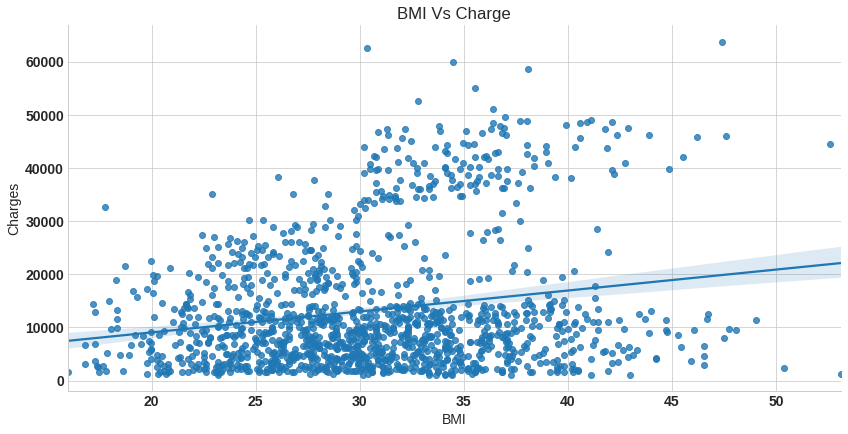

In [23]:
sns.lmplot(x='bmi', y='charges', data=dataset, aspect=2, height=6)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI Vs Charge');

In [14]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


# Check for missing values using a heatmap

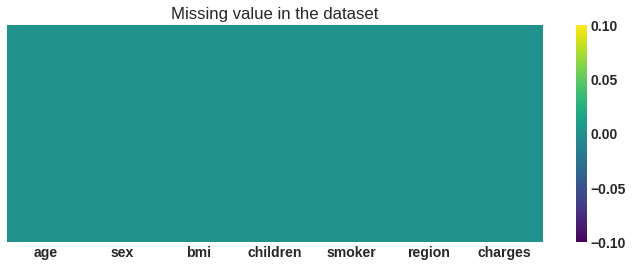

In [21]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(),cbar=True,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

# Plot correlation


In [25]:
correlation = dataset.corr()
print(correlation)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


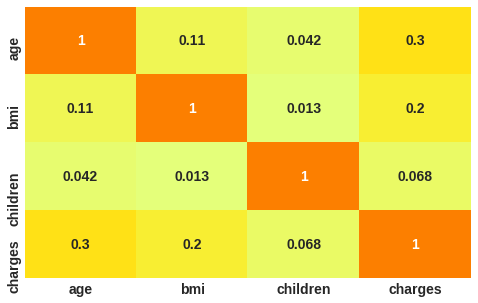

In [29]:
sns.heatmap(correlation, cbar=False, annot=True, cmap='Wistia')

# Distribution of 'charges'

Text(0.5, 1.0, 'Distribution of insurance charges')

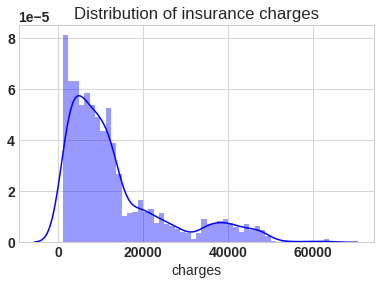

In [56]:
fig = plt.figure(figsize=[14, 4])
axes = fig.add_subplot(121)
sns.distplot(dataset['charges'], bins=50, ax=axes, color='b')
axes.set_title('Distribution of insurance charges')

The plot is right skewed. We will apply log.


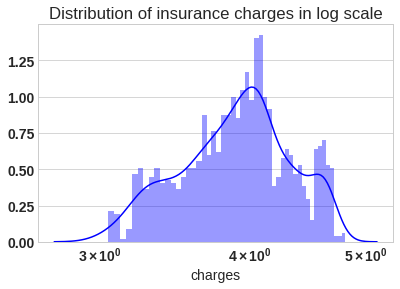

In [59]:
fig = plt.figure(figsize=[14, 4])
axes = fig.add_subplot(121)
sns.distplot(np.log10(dataset['charges']), bins=50, ax=axes, color='b')
axes.set_title('Distribution of insurance charges in log scale')
axes.set_xscale('log')

Lets check the relation between ('sex' and 'charge'), and ('smoker' and 'charge')

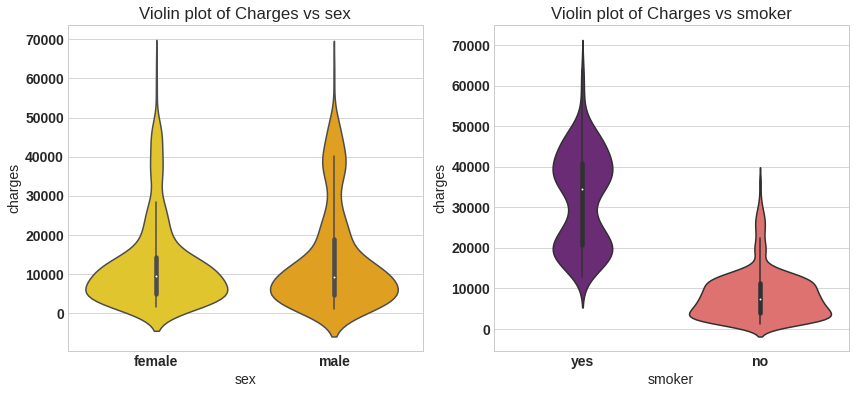

In [61]:
fig = plt.figure(figsize=(14,6))
axes = fig.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=dataset,palette='Wistia',ax=axes)
axes.set_title('Violin plot of Charges vs sex')

axes = fig.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=dataset, palette='magma', ax=axes)
axes.set_title('Violin plot of Charges vs smoker');

The charge for male and female is approximatley in the same range. But the insurance charge for smokers is much wide range compare to non smokers.

Lets check the mean, min, and max of charge for number of children

In [70]:
dataset.groupby('children').agg(['mean', 'min', 'max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

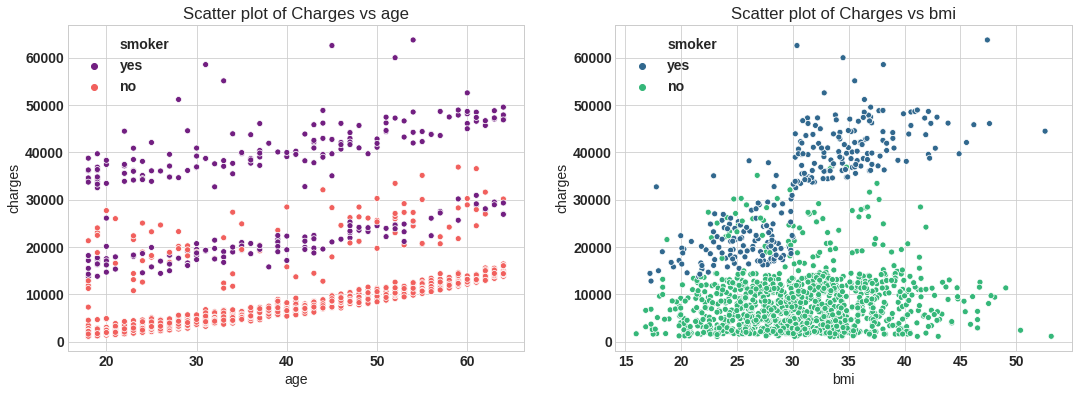

In [74]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=dataset, palette='magma', hue='smoker', ax=axes)
axes.set_title('Scatter plot of Charges vs age')

axes = fig.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=dataset, palette='viridis', hue='smoker')
axes.set_title('Scatter plot of Charges vs bmi')

In [0]:
X = dataset.iloc[:, : -1].values
Y = dataset.iloc[:, -1].values

In [0]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


# Encode Categorical Data

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder

In [0]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')

In [0]:
print(X.shape)
X = np.array(ct.fit_transform(X))
print(X.shape)

(1338, 6)
(1338, 11)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [0]:
X_train[:, 8:] = sc_x.fit_transform(X_train[:, 8:])

In [0]:
X_test[:, 8:] = sc_x.transform(X_test[:, 8:])

In [0]:
print(X_train.shape)
print(X_test.shape)

(1070, 11)
(268, 11)


In [0]:
Y_train = sc_y.fit_transform(Y_train.reshape(-1, 1))
Y_test = sc_y.transform(Y_test.reshape(-1, 1))

In [0]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
Y_pred = regressor.predict(X_test)

In [0]:
regressor.score(X_test, Y_test)

0.892384600382617

In [0]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8923846003826169

regressor.score(X_train, Y_train)

In [0]:
test_data = [[37,'male',29.83,2,'no','northeast']]
test_data = np.array(ct.transform(test_data))
test_data[:, 8:] = sc_x.transform(test_data[:, 8:])
sc_y.inverse_transform(regressor.predict(test_data))

array([7689.07654333])